In [2]:
import os

from pypdf import PdfReader
from typing import (
  List,
  Dict
)

In [3]:
# modificar: tiene 3 for 
def get_files (directory: str, fmt: List[str]):
  dict_files:Dict = { f:[] for f in fmt }

  for root,_,files in os.walk (directory):
    for file in files:
      for f in fmt:
        if file.endswith(f):
          dict_files[f].append(os.path.join(root,file))

  return dict_files

data_path_split = os.getcwd().split('\\')
ROOT_PATH = "\\".join(data_path_split[:len(data_path_split)-2])
DATA_PATH = ROOT_PATH + '\\_data\\private\\'

dirs = get_files(DATA_PATH, ['.pdf'])
pdf_dirs = dirs.get( '.pdf' )
pdf_dirs

['d:\\Study\\- PROYECTOS\\python-code-vault\\main\\_data\\private\\documents\\experimental-functions.pdf',
 'd:\\Study\\- PROYECTOS\\python-code-vault\\main\\_data\\private\\documents\\Martin George R R - Cancion De Hielo Y Fuego 01 - Juego de Tronos.pdf',
 'd:\\Study\\- PROYECTOS\\python-code-vault\\main\\_data\\private\\documents\\results_02_acapulco.pdf']

In [ ]:
document = PdfReader( pdf_dirs[0] )
for page in document.pages:
  print( page.extract_text() )

 
  
 
   
 
Curso  FUNCIONES 
 
  
 
 
 
  
MSc. Valentina Badía Albanés 
Facultad de Matemática y Computación 
Universidad de La Habana  
 1INDICE 
 
  
 
 
 Introducción…………………………..……………………………………… 2 
I. Conjuntos numéricos……………………………..………………………… 3 
 1. Inducción matemática……….…………………………………………. 3 
 2. Los números racionales……..…...…………………………………….. 6  3. Los números reales…...……..…...…………………………………….. 9 II. Funciones.……………………….…………………………………………… 13  1. Definición de función…………………......…………………………….. 13 
 2. Operaciones con funciones. Funciones monótonas………………… 18  3. Clasificación de las funciones. Funciones polinómicas…..………… 24  4. Funciones racionales………………………………………………….... 29  5. Funciones irracionales.  Función módulo, part e entera, signo…...… 35 
 6. Funciones trascendentes.  Funciones inversas……………………… 39 
 7. Funciones trigonométricas ……………………………………………. 46  8.  Funciones trigonométricas inversas………………………………….. 50 
 
 
      
 2INTRODUCCIÓN 
 
 A partir del curso académico 2005-

In [ ]:
import base64
import io

import fitz
from PIL import Image


def pdf_page_to_base64(pdf_path: str, page_number: int):
  pdf_document = fitz.open(pdf_path)
  page = pdf_document.load_page(page_number)
  pix = page.get_pixmap()
  img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

  buffer = io.BytesIO()
  img.save(buffer, format="PNG")

  return base64.b64encode(buffer.getvalue()).decode("utf-8")

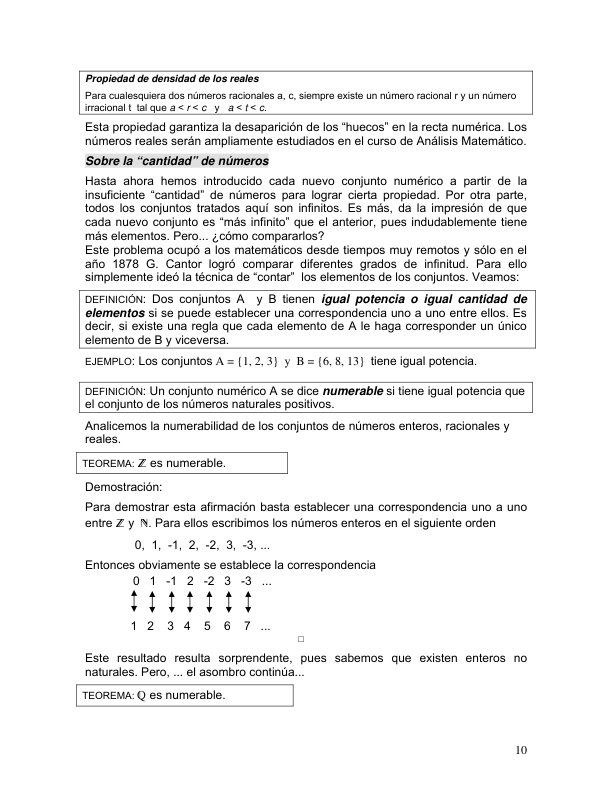

In [6]:
from IPython.display import Image as IPImage
from IPython.display import display

base64_image = pdf_page_to_base64(pdf_dirs[0], 11)
display(IPImage(data=base64.b64decode(base64_image)))